In [1]:
%load_ext nb_black
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics as m
import xgboost as xgb
import seaborn as sns

from imblearn.over_sampling import SMOTE  # doctest: +NORMALIZE_WHITESPACE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from collections import Counter

from collections import Counter
from numpy.random import RandomState
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC


warnings.filterwarnings("ignore")
random_seed = 8

Using TensorFlow backend.


<IPython.core.display.Javascript object>

In [2]:
data1 = pd.read_csv("../NextYearData_actualData_train.txt")
data2 = pd.read_csv("../ThisYearData_actualData_train.txt")
data3 = pd.read_csv("../ThisYearData_actualData_test.txt")

data4 = pd.read_csv("../NextYearData_actualData_test.txt")
data5 = pd.read_csv("../Predicted_NextYearData.txt")

<IPython.core.display.Javascript object>

In [3]:
data = pd.read_csv("../../sep19SexAndAgeAddedFINAL DATASET_ver2.txt")

# filter the data set
data = data[data.FIELD_16 != 1]  # exclude people who are diagnosed for (diabetes)
data = data[data.FIELD_23 != 1]  # exclude people who are on medication for diabetes

data = data[
    data.FIELD_15 != 1
]  # exclude people who are diagnosed for (high blood pressure)
data = data[
    data.FIELD_22 != 1
]  # exclude people who are on medication for high blood pressure

data = data[data.FIELD_17 != 1]  # exclude people who are diagnosed for hyperlipidemia
data = data[
    data.FIELD_24 != 1
]  # exclude people who are on medication for hyperlipidemia


conditions = [
    (data.L100800 < 100),
    (data.L100800 >= 100) & (data.L100800 < 126),
    (data.L100800 >= 126),
]
choices = [0, 1, 2]
data["CLASS"] = np.select(conditions, choices, default=0)

<IPython.core.display.Javascript object>

In [4]:
maindata = data.copy()

maindata = maindata[
    [
        "FIELD_1",
        "FIELD_2",
        "L104600",
        "L103000",
        "S000300",
        "L101700",
        "L100700",
        "FIELD_33",
        "FIELD_38",
        "FIELD_40",
        "FIELD_31",
        "SEX",
        "AGE",
        "L100800",
        "CLASS",
    ]
]
maindata["index"] = maindata.index
print(maindata.shape)

(466680, 16)


<IPython.core.display.Javascript object>

In [5]:
# exclude data points which are going to be used for trainig
print(data4.shape)

temp = pd.merge(
    maindata[["index", "FIELD_1", "FIELD_2"]],
    data4[["FIELD_1", "FIELD_2"]],
    how="inner",
    left_on=["FIELD_1", "FIELD_2"],
    right_on=["FIELD_1", "FIELD_2"],
)

print(temp.shape)

maindata = maindata.drop(temp["index"])
maindata.shape

(12458, 16)
(12092, 3)


(454588, 16)

<IPython.core.display.Javascript object>

In [6]:
maindata = maindata.dropna()
print(maindata.shape)

(130632, 16)


<IPython.core.display.Javascript object>

In [7]:
maindata.columns

Index(['FIELD_1', 'FIELD_2', 'L104600', 'L103000', 'S000300', 'L101700',
       'L100700', 'FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_31', 'SEX', 'AGE',
       'L100800', 'CLASS', 'index'],
      dtype='object')

<IPython.core.display.Javascript object>

In [8]:
maindata.groupby(by="CLASS").size()

CLASS
0    95662
1    32739
2     2231
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
maindata.columns

Index(['FIELD_1', 'FIELD_2', 'L104600', 'L103000', 'S000300', 'L101700',
       'L100700', 'FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_31', 'SEX', 'AGE',
       'L100800', 'CLASS', 'index'],
      dtype='object')

<IPython.core.display.Javascript object>

In [10]:
x = maindata[
    [
        "L104600",
        "L103000",
        "S000300",
        "L101700",
        "L100700",
        "FIELD_33",
        "FIELD_38",
        "FIELD_40",
        "FIELD_31",
        "SEX",
        "AGE",
    ]
]

y = maindata[["CLASS"]]

<IPython.core.display.Javascript object>

In [11]:
maindata.to_csv("o_test.txt", sep=",")

<IPython.core.display.Javascript object>

In [25]:
xtest = data4[
    [
        "L104600",
        "L103000",
        "S000300",
        "L101700",
        "L100700",
        "FIELD_33",
        "FIELD_38",
        "FIELD_40",
        "FIELD_31",
        "SEX",
        "AGE",
    ]
]
ytest = data4.CLASS

<IPython.core.display.Javascript object>

In [12]:
sm = SMOTE(random_state=random_seed)
X_res, y_res = sm.fit_resample(x, y)

print("Resampled dataset shape %s" % Counter(y_res))
print(
    y_res[y_res == 0].shape[0], y_res[y_res == 1].shape[0], y_res[y_res == 2].shape[0]
)
print(X_res.shape, y_res.shape)

y_res2 = y_res.copy()

Resampled dataset shape Counter({1: 95662, 0: 95662, 2: 95662})
95662 95662 95662
(286986, 11) (286986,)


<IPython.core.display.Javascript object>

In [13]:
temp = pd.DataFrame(X_res)
temp.columns = x.columns
temp["CLASS"] = y_res
temp.tail()

,L104600,L103000,S000300,L101700,L100700,FIELD_33,FIELD_38,FIELD_40,FIELD_31,SEX,AGE,CLASS
286981,8.124839,64.554633,22.439555,14.882431,3.700000,1.000000,0.000000,0.000000,0.554633,0.445367,56.000000,2
286982,6.592784,120.000000,24.113333,29.725492,4.838039,2.309803,1.000000,0.654902,0.000000,0.000000,46.654902,2
286983,7.632712,296.403725,29.752794,64.865425,5.513458,2.567288,1.567288,1.298137,0.000000,0.000000,43.269150,2
286984,6.893774,203.000000,21.324904,36.925287,4.113697,1.024904,2.000000,1.000000,0.987548,0.987548,52.024904,2
286985,7.861178,185.711433,22.482576,147.248624,5.305992,3.000000,3.000000,0.865702,0.711433,0.000000,47.422865,2


<IPython.core.display.Javascript object>

In [14]:
maindata.tail()

,FIELD_1,FIELD_2,L104600,L103000,S000300,L101700,L100700,FIELD_33,FIELD_38,FIELD_40,FIELD_31,SEX,AGE,L100800,CLASS,index
535157,999977,20130907,5.00,102.0,27.7,31.0,5.2,1.0,3.0,2.0,0.0,0.0,46.0,88.0,0,535157
535158,999977,20140726,5.10,60.0,27.4,29.0,6.2,1.0,3.0,3.0,0.0,0.0,47.0,93.0,0,535158
535160,999977,20160729,5.08,85.0,27.4,37.0,7.1,1.0,3.0,3.0,0.0,0.0,49.0,102.0,1,535160
535161,999977,20170807,4.92,236.0,28.2,42.0,6.3,1.0,3.0,2.0,0.0,0.0,50.0,93.0,0,535161
535166,999986,20170629,6.97,110.0,27.2,132.0,8.0,1.0,4.0,2.0,0.0,0.0,50.0,164.0,2,535166


<IPython.core.display.Javascript object>

In [15]:
# from sklearn.preprocessing import LabelEncoder

# enc = LabelEncoder()
# enc.fit(x.FIELD_40)
# x.FIELD_40 = enc.transform(x.FIELD_40)

<IPython.core.display.Javascript object>

In [16]:
# x.FIELD_40 = x.FIELD_40.astype(int)

sm = SMOTENC(random_state=42, categorical_features=[5, 6, 7, 8])
X_res, y_res = sm.fit_resample(x, y)
print("Resampled dataset samples per class {}".format(Counter(y_res)))

Resampled dataset samples per class Counter({1: 95662, 0: 95662, 2: 95662})


<IPython.core.display.Javascript object>

In [17]:
x.FIELD_40.unique()

array([2., 0., 1., 5., 6., 4., 3., 7., 9.])

<IPython.core.display.Javascript object>

In [18]:
x.head()

,L104600,L103000,S000300,L101700,L100700,FIELD_33,FIELD_38,FIELD_40,FIELD_31,SEX,AGE
4,5.18,92.0,23.7,24.0,2.8,2.0,3.0,2.0,0.0,0.0,50.0
7,5.30,92.0,25.1,40.0,7.9,2.0,6.0,0.0,0.0,0.0,46.0
9,5.40,60.0,18.0,24.0,5.6,1.0,1.0,1.0,0.0,0.0,46.0
10,5.50,90.0,18.5,29.0,5.6,1.0,1.0,1.0,0.0,0.0,47.0
11,5.53,58.0,19.2,37.0,5.6,1.0,1.0,1.0,0.0,0.0,48.0


<IPython.core.display.Javascript object>

In [19]:
y.head()

,CLASS
4,1
7,0
9,0
10,0
11,0


<IPython.core.display.Javascript object>

In [20]:
temp = pd.DataFrame(X_res)
temp.columns = x.columns
temp["CLASS"] = y_res
temp.tail()

,L104600,L103000,S000300,L101700,L100700,FIELD_33,FIELD_38,FIELD_40,FIELD_31,SEX,AGE,CLASS
286981,6.257551,979.452791,26.141523,47.169797,6.624518,3.0,1.0,0.0,0.0,0.0,55.603808,2
286982,6.569020,201.000000,23.508213,37.397694,7.240922,1.0,0.0,0.0,0.0,0.0,39.099424,2
286983,5.557489,183.851739,30.266565,42.814674,5.692587,3.0,1.0,0.0,0.0,0.0,45.148261,2
286984,6.152461,218.271978,27.363422,74.000000,6.181711,3.0,2.0,2.0,0.0,0.0,51.181711,2
286985,6.572337,973.058097,28.528214,43.533890,6.648548,1.0,1.0,0.0,0.0,0.0,56.495159,2


<IPython.core.display.Javascript object>

In [21]:
temp.to_csv("g_test", sep=",")

<IPython.core.display.Javascript object>

In [22]:
temp.shape

(286986, 12)

<IPython.core.display.Javascript object>

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=10,
    max_features="auto",
)
rf.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

<IPython.core.display.Javascript object>

0.7512441804462996


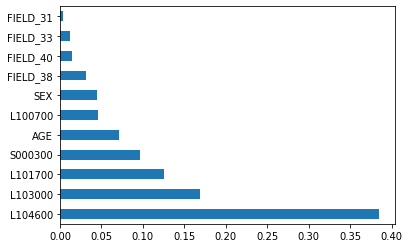

Index(['L104600', 'L103000', 'L101700', 'S000300', 'AGE', 'L100700', 'SEX',
       'FIELD_38', 'FIELD_40', 'FIELD_33', 'FIELD_31'],
      dtype='object')


<IPython.core.display.Javascript object>

In [30]:
from matplotlib import pyplot as plt

ypred = rf.predict(xtest)

score = rf.score(xtest, ytest)
print(score)

feat_importances = pd.Series(rf.feature_importances_, index=xtest.columns)
feat_importances.nlargest(16).plot(kind="barh")
plt.show()

print(feat_importances.nlargest(16).index)

In [33]:
print("Accuracy on training set: {:.3f}".format(rf.score(x, y)))
print("Accuracy on test set: {:.3f}".format(rf.score(xtest, ytest)))

confmatrx = pd.DataFrame(m.confusion_matrix(ytest, ypred))
confmatrx.head()

Accuracy on training set: 0.800
Accuracy on test set: 0.751


,0,1,2
0,8044,535,1
1,2416,1213,13
2,18,116,102


<IPython.core.display.Javascript object>

In [34]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.84      8580
           1       0.65      0.33      0.44      3642
           2       0.88      0.43      0.58       236

    accuracy                           0.75     12458
   macro avg       0.77      0.57      0.62     12458
weighted avg       0.74      0.75      0.72     12458



<IPython.core.display.Javascript object>